<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-modules" data-toc-modified-id="import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import modules</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#import-data" data-toc-modified-id="import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import data</a></span><ul class="toc-item"><li><span><a href="#transform-data-from-strings-to-numeric-data" data-toc-modified-id="transform-data-from-strings-to-numeric-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>transform data from strings to numeric data</a></span></li><li><span><a href="#prepare-data-for-model" data-toc-modified-id="prepare-data-for-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>prepare data for model</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# import modules

In [76]:
#import modules for Obtain/Scrub/Explore
import re
import pandas as pd 
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from collections import Counter

In [77]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [78]:
# import modules for model
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import random
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,  LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import gensim


## functions

In [79]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [80]:
def model_results(x):
    results_train = x.evaluate(X_train, y_train)
    print('Training:', results_train)
    results_test = x.evaluate(X_test, y_test)
    print('Test:', results_test)
    

In [81]:
# x=X_train_scaled, y = y_train_scaled, z = y_test_scaled
def cv_score(model, x_train, y_train, y_test, y_pred):
    #CV scores, 10 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=10)
    #Prediction and accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    #Print the summary
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Accuracy: %0.2f" % (accuracy_test))

In [82]:
#visualize confusion matrix
def vis_cm(model, X, y, y_pred):
    score = model.score(X, y)
    confusion = confusion_matrix(y, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [83]:
# assess metrics of model
def get_metrics(y_test, yhat_classes,yhat_probs):
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes)
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes)
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes)
    print('F1 score: %f' % f1)
# ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)
# confusion matrix
    matrix = confusion_matrix(y_test, yhat_classes)
    print(matrix)

# import data

In [84]:
df = pd.read_csv('pn_df.csv')

## transform data from strings to numeric data

## prepare data for model 

In [90]:
# convert target data with labelencoder
le = LabelEncoder()
y = df['target'].copy()
le.fit_transform(y)
# define independent variable
X = df.wordl.copy()
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)


In [91]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (679,)
Train label shape: (2713,)
Validation label shape: (272,)
Test shape: (679,)
Train shape: (2713,)
Validation shape: (272, 16802)


In [92]:
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), ])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense() 

In [93]:
# verify shape of transformed data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (679,)
Train label shape: (2713,)
Validation label shape: (272,)
Test shape: (679, 18195)
Train shape: (2713, 18195)
Validation shape: (272, 16802)


In [94]:
counter = Counter(y_train)
print(counter)

Counter({1: 2279, 0: 434})


In [95]:
# apply smote to dataset due to imbalance of pos vs neg sentiment
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 2279, 0: 2279})


In [96]:
# verify new shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

Test label shape: (679,)
Train label shape: (4558,)
Test shape: (679, 18195)
Train shape: (4558, 18195)
Counter({1: 2279, 0: 2279})
18195


In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB

In [110]:
## perform grid search

In [134]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'criterion':['entropy', 'gini'],
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, 25],
    'max_features': [3, 5, 10, 20, 30]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    vis_cm(model, X_test, y_test, y_pred)
    return grid_search

In [ ]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

In [117]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 
         'mean_test_accuracy_score', 'param_max_depth', 
         'param_max_features', 'param_min_samples_split', 
         'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
75,0.922,0.994,0.952,25,3,5,300
77,0.916,0.994,0.947,25,3,10,300
73,0.914,0.995,0.947,25,3,3,300
51,0.910,0.994,0.944,15,3,5,300
49,0.909,0.995,0.944,15,3,3,300


In [ ]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [ ]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [120]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [ ]:
precision_recall_threshold(p, r, thresholds, 0.516)

# Instantiate random forest on balanced smote data
rf = RandomForestClassifier(n_jobs=-1)

# Fit the model to training data
rf_model = rf.fit(X3_train, y3_train)

# Predict on test set
y_pred_rf = rf_model.predict(X3_test)
print(rf_model.score(X3_train, y3_train))
print(rf_model.score(X3_test, y3_test))
print(classification_report(y3_test, y_pred_rf))

In [162]:
 #cv scores
cv_score(rf_model, X3_train, y3_train, y3_test, y_pred_rf)

Accuracy: 0.87 (+/- 0.02)
Test Accuracy: 0.87


In [163]:
confusion_matrix(y_test, y_pred_rf)

array([[ 24,  85],
       [  3, 567]])

Train AUC: 0.9999024865919064
Test AUC: 0.8038065346853371


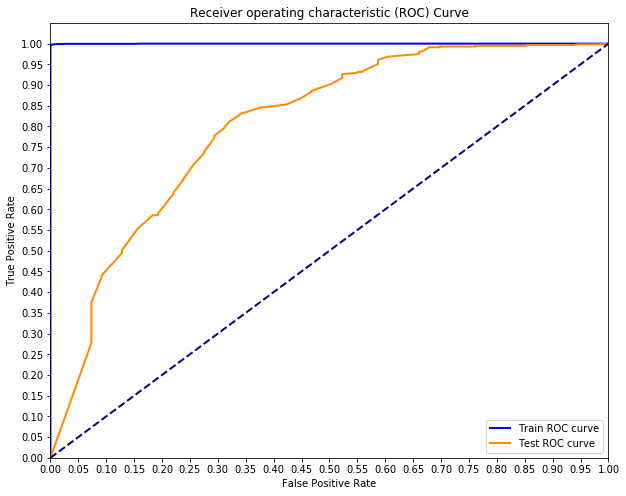

In [164]:
test_probs = rf_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = rf_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [165]:
# did not perform well on negative data either

In [ ]:

clf = KNeighborsClassifie(n_jobs=-1)

param_grid = {
    'leaf_size' :[list(range(1,50))],
    'n_neighbors' : [list(range(1,30))],
    'p':[1,2]
   
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 
         'mean_test_accuracy_score', 'param_max_depth', 
         'param_max_features', 'param_min_samples_split', 
         'param_n_estimators']].round(3).head()

In [ ]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

knn_clf = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
# Fit the model to training data
knn_model = knn_clf.fit(X3_train, y3_train)
# Predict on test set
y_pred_knn = knn_model.predict(X3_test)
print(knn_model.score(X3_train, y3_train))
print(knn_model.score(X3_test, y3_test))
print(classification_report(y3_test, y_pred_knn))
# confusion matrix
confusion_matrix(y3_test, y_pred_knn)

In [167]:
# cv scores
cv_score(knn_model, X3_train, y3_train, y3_test, y_pred_knn)

Accuracy: 0.87 (+/- 0.03)
Test Accuracy: 0.86


Train AUC: 0.9999774969058246
Test AUC: 0.7070416867857718


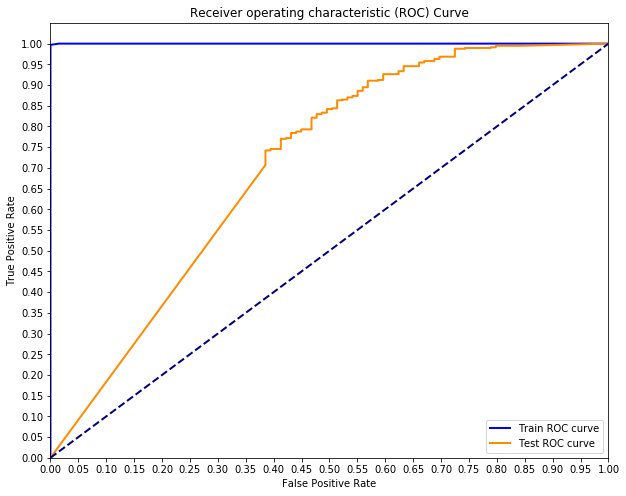

In [168]:
test_probs = knn_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = knn_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


none of the statistical methods performed well on data, due to lack of data. this was tried on smote dataset as well, with similar results

# no smote applied data analysis 

In [ ]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y_train)
# build TFIDF features on tweet with tfidf vectorizer
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), ])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense() 
X_val = pipeline.transform(X_val).todense()


In [ ]:
# verify new shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

In [ ]:
# assess class distribution for prior / weights
counter = Counter(y3_train)
print(counter)
print(len(y3_train))
prob1= 2279/3392
prob0=434/3392
print (prob1)
print (prob0)

In [ ]:
# show the distribution
print('y_train class distribution')
print(y_train.value_counts(normalize=True))
print('y_test class distribution')
print(y_test.value_counts(normalize=True))

In [151]:
# Instantiate multinomial bayes
mnb = MultinomialNB(alpha=1.0, fit_prior=True)

# Fit the model to training data
mnb_model = mnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_mnb = mnb_model.predict(X3_test)
print(mnb_model.score(X3_train, y3_train))
print(mnb_model.score(X3_test, y3_test))
print(classification_report(y_test, y_pred_mnb))

0.869315854158132
0.845360824742268
              precision    recall  f1-score   support

           0       0.83      0.05      0.09       109
           1       0.85      1.00      0.92       570

    accuracy                           0.85       679
   macro avg       0.84      0.52      0.50       679
weighted avg       0.84      0.85      0.78       679



In [ ]:
decisions = (model.predict_proba() >= mythreshold).astype(int)
y_pred_new_threshold = (logreg.predict_proba(X_test)[:,1]>=0.6).astype(int)

In [152]:
#did not perform well on negative sentiment data(also smaller class)

In [153]:
# get accuracy scores for training data vs test data
cv_score(mnb_model, X3_train, y3_train, y3_test, y_pred_mnb)

Accuracy: 0.85 (+/- 0.01)
Test Accuracy: 0.85


In [154]:
confusion_matrix(y3_test, y_pred_mnb)

array([[  5, 104],
       [  1, 569]])

Train AUC: 0.9738589055995199
Test AUC: 0.7656365684854338


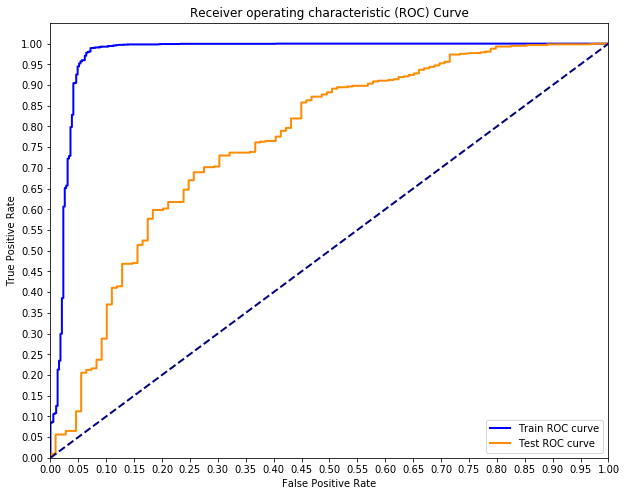

In [155]:

#plot roc/auc
test_probs = mnb_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = mnb_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [156]:
# Instantiate bernoulli naive bayes on og data
bnb = BernoulliNB(alpha=1.0, fit_prior=True)

# Fit the model to training data
bnb_model = bnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_bnb = bnb_model.predict(X3_test)
print(bnb_model.score(X3_train, y3_train))
print(bnb_model.score(X3_test, y3_test))
print(classification_report(y_test, y_pred_bnb))

0.8811962310528472
0.845360824742268
              precision    recall  f1-score   support

           0       0.83      0.05      0.09       109
           1       0.85      1.00      0.92       570

    accuracy                           0.85       679
   macro avg       0.84      0.52      0.50       679
weighted avg       0.84      0.85      0.78       679



In [157]:
# cv scores
cv_score(bnb_model, X3_train, y3_train, y3_test, y_pred_bnb)

Accuracy: 0.84 (+/- 0.01)
Test Accuracy: 0.85


In [158]:
confusion_matrix(y3_test, y_pred_bnb)

array([[  5, 104],
       [  1, 569]])

Train AUC: 0.9608502419082623
Test AUC: 0.684588765491711


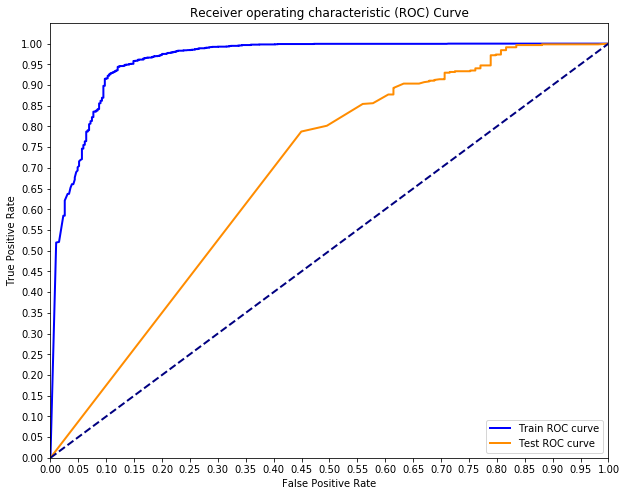

In [159]:
test_probs = bnb_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = bnb_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [160]:
#neither of the bayes classifiers performed well on the negative sentiment data

# Conclusion

models are all overfitting in some capacity. attempted making neural network smaller, applied bias, kernel initializers, l1 and l2 regularizers, batch normalization layers, and dropout layers to minimize loss providing slightly better results but still overfitting occurs to provide accuracy over 80%. this is due to unbalanced and small dataset. this occurs on smote balanced data as well as data ran with weights provided. More data should be obtained to improve results. further assessment planned on retweets and hashtags relativity to sentiment.

due to the fact that i got pretty similar accuracy results(80-87 percent) on the best models using various methods, i think the best way to improve this is to get additional data.